Importação das bibliotecas importantes para limpeza e tratamento de dados

In [56]:
import pandas as pd
import seaborn as srn 
import statistics as sts

Importação e visualização dos dados para entendê-los.

In [57]:
# Importando
dados = pd.read_csv('tempo1.csv', sep=';')  # Os dados estão separados por ;

# Visualizando os 10 primeiros dados
print(dados.head(n=10))

# Vendo o tamanho do dataframe
dados.shape


  Aparencia  Temperatura  Umidade       Vento Jogar
0       sol           85     85.0       FALSO   nao
1       sol           80     90.0  VERDADEIRO   nao
2   nublado           83     86.0       FALSO   sim
3     chuva           70      NaN       FALSO   sim
4     chuva           68     80.0       FALSO   sim
5     chuva           65     70.0  VERDADEIRO   nao
6     menos           64     65.0  VERDADEIRO   sim
7       sol         1220     95.0       FALSO   nao
8       sol           69     70.0       FALSO   sim
9     chuva           75    200.0         NaN   sim


(14, 5)

Analisando os dados.

In [58]:
dados

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


Após análise, percebe-se a existência de valores ausentes (Nan) nas colunas Umidade e Vento e a existência de valores fora do domínio nas colunas Aparencia (sol, nublado e chuva), Temperatura (-130 até 130 F) e Umidade (0 - 100).

## Análise Exploratória dos dados

Dados categóricos

In [59]:
# Vento
vento = dados.groupby(['Vento']).size()
vento

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

<Axes: xlabel='Vento'>

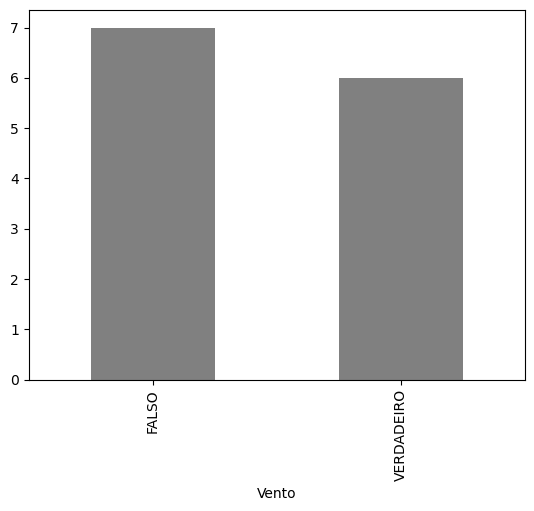

In [60]:
vento.plot.bar(color = 'gray')

In [61]:
# Aparencia
aparencia = dados.groupby(['Aparencia']).size()
aparencia

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

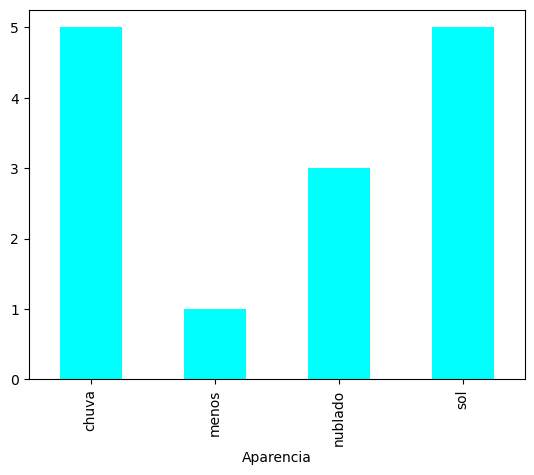

In [62]:
aparencia.plot.bar(color = 'cyan')

In [63]:
# Jogar
jogar = dados.groupby(['Jogar']).size()
jogar

Jogar
nao    5
sim    9
dtype: int64

<Axes: xlabel='Jogar'>

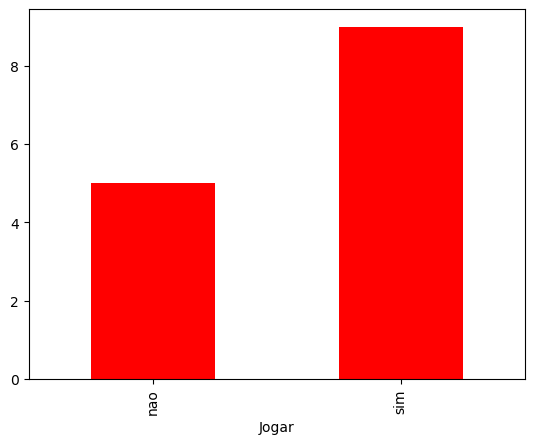

In [64]:
jogar.plot.bar(color= 'red')

Dados numéricos

In [65]:
# Temperatura
dados['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

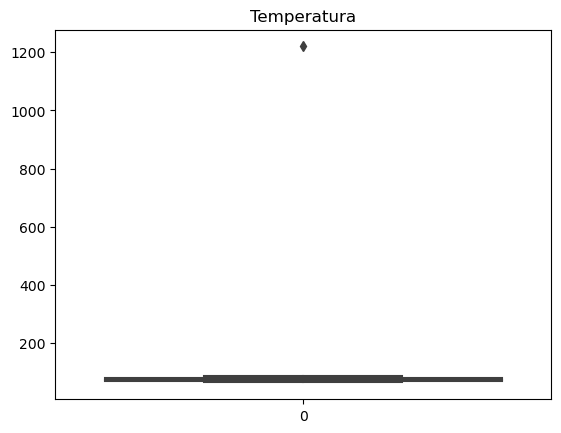

In [66]:
srn.boxplot(dados['Temperatura']).set_title('Temperatura')

<Axes: xlabel='Temperatura', ylabel='Count'>

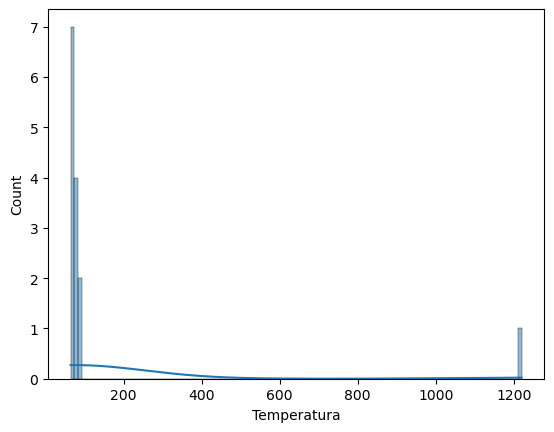

In [67]:
srn.histplot(dados['Temperatura'], kde=True)
# srn.histplot(dados['Temperatura'], kde=True, stat="density")

In [68]:
# Umidade
dados['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Umidade')

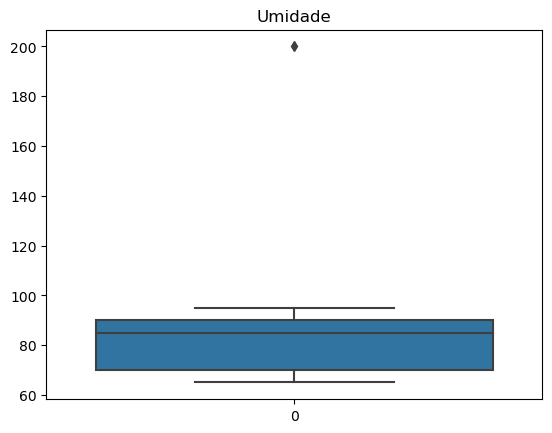

In [69]:
srn.boxplot(dados['Umidade']).set_title('Umidade')

<Axes: xlabel='Umidade', ylabel='Count'>

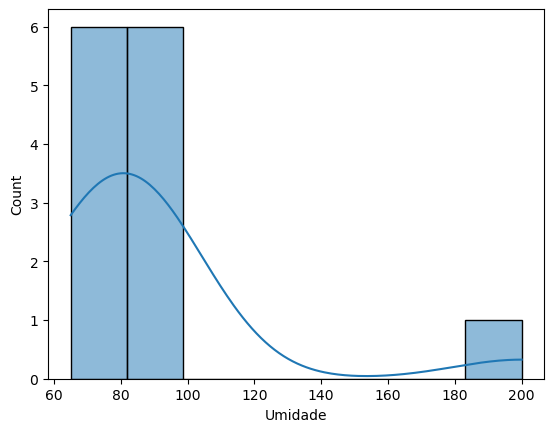

In [70]:
srn.histplot(dados['Umidade'], kde=True)

## Tratamento de dados

In [71]:
# Substituindo os valores NaN na coluna Vento pela moda
print(dados['Vento'].isnull().sum())
print(vento)  # Moda é FALSO
dados['Vento'].fillna('FALSO', inplace=True)
print(dados.groupby(['Vento']).size())

1
Vento
FALSO         7
VERDADEIRO    6
dtype: int64
Vento
FALSO         8
VERDADEIRO    6
dtype: int64


In [72]:
# Substituindo valores fora do domínio da coluna Aparencia pela moda
print(aparencia)  # Moda é sol
dados.loc[dados['Aparencia'] == 'menos', 'Aparencia'] = 'sol'
print(dados.groupby(['Aparencia']).size()) 

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64
Aparencia
chuva      5
nublado    3
sol        6
dtype: int64


In [73]:
# Substituindo as temperaturas fora do domínio pela mediana
print(dados.loc[(dados['Temperatura'] < -130) | (dados['Temperatura'] > 130)])
mediana = sts.median(dados['Temperatura'])
print(f'A mediana das temperaturas é {mediana}')

# Substituindo e verificando se ainda existem temperaturas fora do dominio
dados.loc[(dados['Temperatura'] < -130) | (dados['Temperatura'] > 130), 'Temperatura'] = mediana
dados.loc[(dados['Temperatura'] < -130) | (dados['Temperatura'] > 130)]

  Aparencia  Temperatura  Umidade  Vento Jogar
7       sol         1220     95.0  FALSO   nao
A mediana das temperaturas é 73.5


,Aparencia,Temperatura,Umidade,Vento,Jogar


In [74]:
# Substituindo as umidades fora do domínio pela mediana
print(dados.loc[(dados['Umidade'] < 0) | (dados['Umidade'] > 100)])
mediana = sts.median(dados['Umidade'])
print(f'A mediana das umidades é {mediana}')

# Substituindo e verificando se ainda existem temperaturas fora do dominio
dados.loc[(dados['Umidade'] < 0) | (dados['Umidade'] > 100), 'Umidade'] = mediana
dados.loc[(dados['Umidade'] < 0) | (dados['Umidade'] > 100)]

  Aparencia  Temperatura  Umidade  Vento Jogar
9     chuva         75.0    200.0  FALSO   sim
A mediana das umidades é 85.5


,Aparencia,Temperatura,Umidade,Vento,Jogar


Verificação dos dados para ver se estão corretos.

In [75]:
dados

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,NaN,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,sol,64.0,65.0,VERDADEIRO,sim
7,sol,73.5,95.0,FALSO,nao
8,sol,69.0,70.0,FALSO,sim
9,chuva,75.0,85.5,FALSO,sim


In [81]:
vento = dados.groupby(['Vento']).size()
print(vento)
print('----------')
print(dados['Temperatura'].describe())
print('----------')
print(dados['Aparencia'].describe())
print('----------')
print(aparencia)

Vento
FALSO         8
VERDADEIRO    6
dtype: int64
----------
count    14.000000
mean     73.678571
std       6.556286
min      64.000000
25%      69.250000
50%      72.750000
75%      78.750000
max      85.000000
Name: Temperatura, dtype: float64
----------
count      14
unique      3
top       sol
freq        6
Name: Aparencia, dtype: object
----------
Aparencia
chuva      5
nublado    3
sol        6
dtype: int64


<Axes: xlabel='Aparencia'>

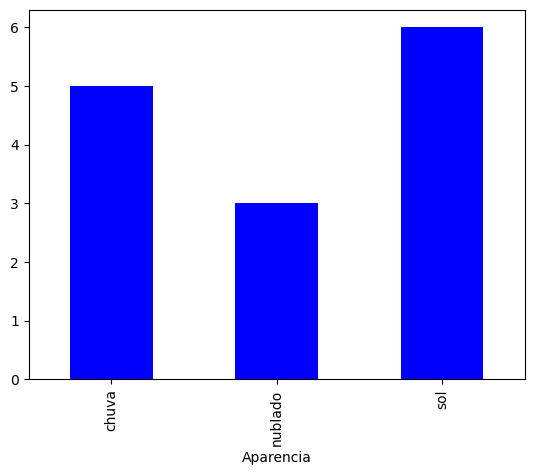

In [90]:
aparencia.plot.bar(color = 'blue')

<Axes: xlabel='Vento'>

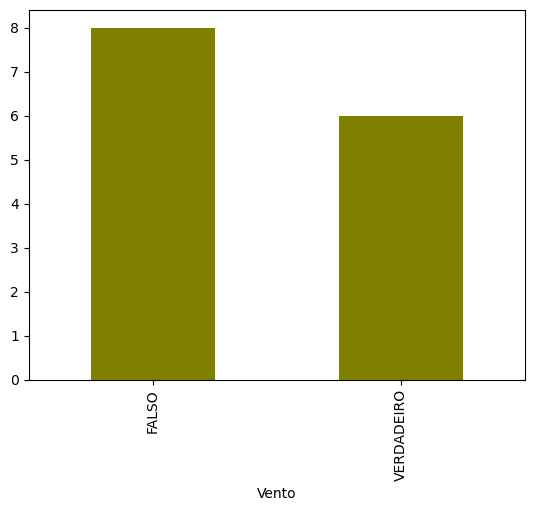

In [91]:
vento.plot.bar(color = 'olive')

Text(0.5, 1.0, 'Temperatura')

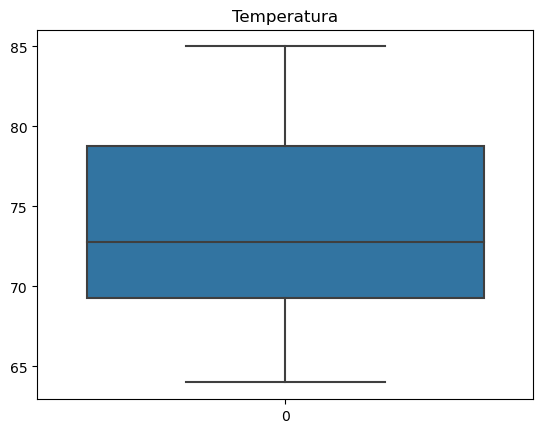

In [93]:
srn.boxplot(dados['Temperatura']).set_title('Temperatura')

<Axes: xlabel='Temperatura', ylabel='Count'>

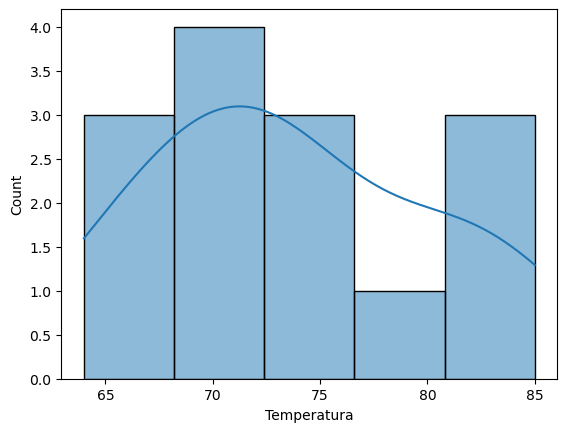

In [94]:
srn.histplot(dados['Temperatura'], kde=True)

Text(0.5, 1.0, 'Umidade')

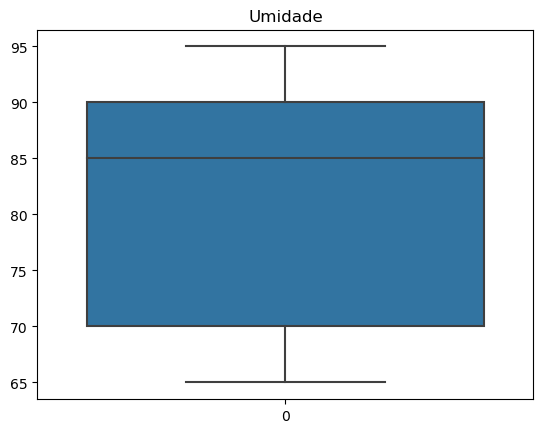

In [95]:
srn.boxplot(dados['Umidade']).set_title('Umidade')

<Axes: xlabel='Umidade', ylabel='Count'>

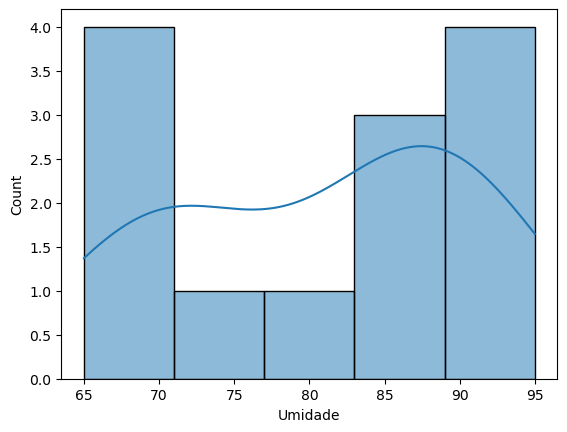

In [96]:
srn.histplot(dados['Umidade'], kde=True)